In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
metadata_Urban = pd.read_excel("../../metadata/CES_Urban_DistributionV2.xlsx", sheet_name="Avg_PUDs_Des")
metadata_Urban["Class"] = metadata_Urban["Class"].str.replace("_", " ")
metadata_Urban = metadata_Urban.rename(columns={"Other areas": "Other NWLs"})
metadata_Urban = metadata_Urban[metadata_Urban["Class"] != "Other"]

In [3]:
metadata_Urban.set_index("Class", inplace=True)
metadata_Urban

,Urban greenspaces,Non-urban greenspaces,State parks,National parks,Protected areas,Other NWLs,Urban greenspaces %,Non-urban greenspaces %,State parks %,National parks %,Protected areas %,Other areas %
Class,,,,,,,,,,,,
Biking,0.185085,0.177083,0.170752,0.166667,0.187590,0.197117,17.069604,16.331681,15.747734,15.370994,17.300686,18.179300
Boating,0.207401,0.188333,0.178512,0.178161,0.222363,0.234872,17.145651,15.569343,14.757399,14.728408,18.382573,19.416626
Camping,0.193350,0.166667,0.206816,0.183806,0.207361,0.252926,15.967095,13.763574,17.079168,15.178977,17.124179,20.887007
Fishing,0.197152,0.166667,0.174525,0.188732,0.216518,0.237675,16.689870,14.109112,14.774374,15.977030,18.329289,20.120324
Hiking,0.182674,0.166667,0.177313,0.174744,0.186011,0.193643,16.897778,15.417078,16.401878,16.164296,17.206520,17.912449
Horseback Riding,0.195187,0.166667,0.173333,0.200000,0.191829,0.212361,17.131041,14.627871,15.212986,17.553445,16.836299,18.638359
Hunting,0.192836,0.000000,0.179784,0.252296,0.195664,0.251147,17.993036,0.000000,16.775167,23.541103,18.256856,23.433839
Shelling,0.230309,0.269444,0.183444,0.193066,0.205086,0.210420,17.828978,20.858548,14.200964,14.945877,15.876364,16.289268
Surfing,0.198451,0.179333,0.180527,0.192837,0.196071,0.199095,17.312115,15.644336,15.748510,16.822305,17.104445,17.368289


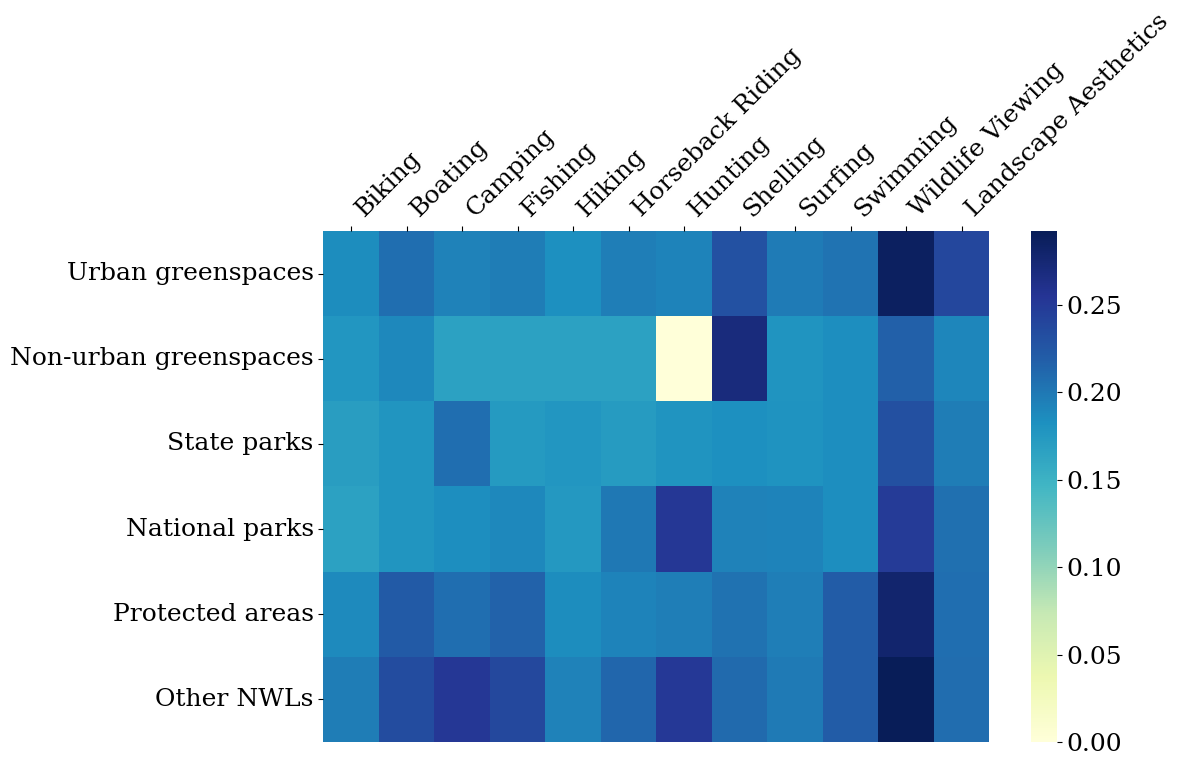

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set font globally ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]
plt.rcParams["font.size"] = 18            # Base font size
plt.rcParams["axes.titlesize"] = 18       # Title font size
plt.rcParams["axes.labelsize"] = 18       # Axis label size
plt.rcParams["xtick.labelsize"] = 18      # X tick labels
plt.rcParams["ytick.labelsize"] = 18      # Y tick labels


plt.figure(figsize=(12, 8))

# 1. transpose the data
rotated = metadata_Urban.loc[:, "Urban greenspaces":"Other NWLs"].T
rotated.index.name = None
rotated.columns.name = None

# 2. draw heatmap (normal orientation after transpose)
ax = sns.heatmap(rotated, cmap="YlGnBu", annot=False)

# 3. Move "old y labels" (land types) to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")



# 4. Adjust x tick labels (land types)
plt.xticks(rotation=45, ha="left")

# 5. Adjust y tick labels (activities)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("../../figures/Urban_Types_rotated_layout.tif", dpi=300, bbox_inches="tight")
plt.show()


# Radar Chart

In [5]:
metadata_NLCD = pd.read_excel("../../metadata/CES_NLCD_percentagesV2.xlsx", sheet_name="Avg_PUDs_Des")
metadata_NLCD.columns = metadata_NLCD.columns.str.replace('_count', '', regex=False)
metadata_NLCD = metadata_NLCD.rename(columns={"Unnamed: 0": "Class"})
metadata_NLCD["Class"] = metadata_NLCD["Class"].str.replace("_", " ")
metadata_NLCD = metadata_NLCD[metadata_NLCD["Class"] != "Other"]
metadata_NLCD.set_index("Class", inplace=True)

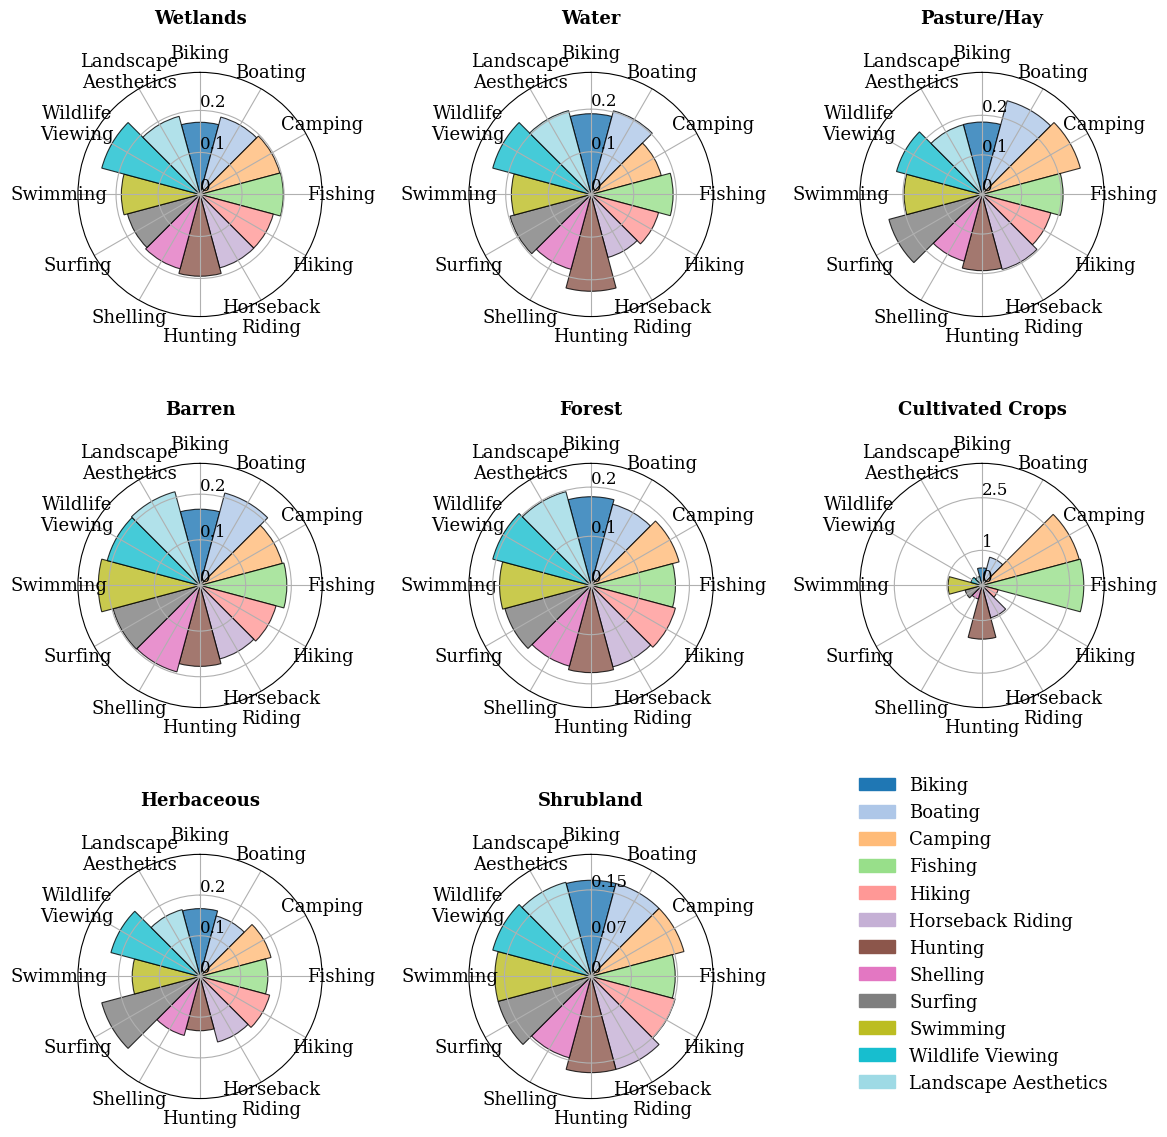

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Prepare your dataset ===
data = metadata_NLCD.loc[:, "Wetlands":"Shrubland"]

# === 2. Choose which columns to plot ===
cols = ["Wetlands", "Water", "Pasture/Hay", "Barren",
        "Forest", "Cultivated Crops", "Herbaceous", "Shrubland"]

# === 3. Font setup (optional) ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

# === 4. Create 2-column × 4-row figure ===
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), subplot_kw=dict(polar=True))
fig, axes = plt.subplots(3, 3, figsize=(12, 12), subplot_kw=dict(polar=True))


axes = axes.flatten()

# === 5. Loop through each land-cover type ===
for i, col in enumerate(cols):
    ax = axes[i]

    # Values and angles
    values = data[col].values
    N = len(values)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Color each bar by height (optional)
    colors = plt.cm.viridis(values / values.max())
    colors = plt.cm.tab10(np.linspace(0, 1, len(cols)))  # 8-color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 12))
    
    # Draw bars
    bars = ax.bar(angles, values,
                  width=2 * np.pi / N,
                  color=colors, #colors,
                  alpha=0.8,
                  edgecolor="black",
                  linewidth=0.8)

    


    # Label setup
    ax.set_xticks(angles)
    
    import textwrap
    # wrap each label to two lines max (break long words automatically)
    wrapped_labels = [textwrap.fill(label, width=10) for label in data.index]
    ax.set_xticklabels(wrapped_labels, fontsize=13)
    
    # --- Compute key radial values ---
    min_val = 0
    med_val = np.median(values)
    max_val = values.max()
    
    # #ax.set_xticklabels(df.index, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(col, fontsize=13, fontweight='bold', pad=15)
    
    # --- Set radial (y-axis) ticks ---
    ax.set_ylim(0, 3)                          # max radial value = 3
    if col == 'Cultivated Crops':
        ax.set_yticks([0, 1, 2.5])                 # fixed ticks
        ax.set_yticklabels(["0", "1", "2.5"], fontsize=12)
    elif col == 'Shrubland':
        ax.set_yticks([0, 0.07, 0.15])                 # fixed ticks
        ax.set_yticklabels(["0", "0.07", "0.15"], fontsize=12)
    else:
        ax.set_yticks([0, 0.1, 0.2])                 # fixed ticks
        ax.set_yticklabels(["0", "0.1", "0.2"], fontsize=12)       
    ax.set_rlabel_position(0)                 # optional (put labels at top)
    # ax.set_yticks([min_val, med_val, max_val])
    # ax.set_yticklabels([f"{min_val:.2f}", f"{med_val:.2f}", f"{max_val:.2f}"], fontsize=8)
    # ax.set_ylim(0, max_val * 1.1)
    # ax.set_rlabel_position(90)  # position of the radial labels (top)

    # Make top start and clockwise
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Set radial limit to slightly above max
    ax.set_ylim(0, data[col].max() * 1.2)

# === 6. Remove any unused axes (if fewer than 8) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === 7. Global title and layout ===
#fig.suptitle("Polar Bar Charts by Land Cover Type", fontsize=18, fontweight="bold", y=1.03)
plt.tight_layout()

# === Legend ===
import matplotlib.patches as mpatches

activity_labels = list(data.index)
color_palette = plt.cm.tab20(np.linspace(0, 1, len(activity_labels)))

patches = [mpatches.Patch(color=color_palette[i], label=activity_labels[i])
           for i in range(len(activity_labels))]

fig.legend(
    handles=patches,
    loc="lower right",
    #bbox_to_anchor=(0.98, 0.02),
    bbox_to_anchor=(0.95, 0.05),  # (x=center, y=small offset from bottom)
    fontsize=13,
    #title="Activities",
    title_fontsize=13,
    ncol=1,
    frameon=False
)

plt.savefig("../../figures/NLCD_Types_3by3_wuthLegend.tif", format="tiff", dpi=300, bbox_inches="tight")
plt.show()

